In [ ]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Carregar os dados do CSV
file_path = 'dados.csv'
df = pd.read_csv(file_path, sep=';', parse_dates=['Data'], dayfirst=True, index_col='Data', encoding='ISO-8859-1')

In [ ]:
# Separar a variável dependente (PIB)
y = df.loc[:, ['PIB_Fpolis_IBGE_5938']]

In [ ]:
# Verificar e converter o índice para datetime
y.index = pd.to_datetime(y.index)

In [ ]:
# Selecionar os dados de treino para o modelo ARIMA
y_arima = y.loc['2012-03-01':'2021-12-01'].asfreq('QS-DEC')

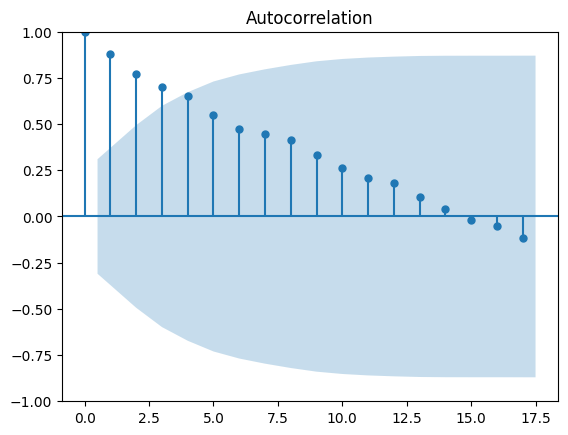

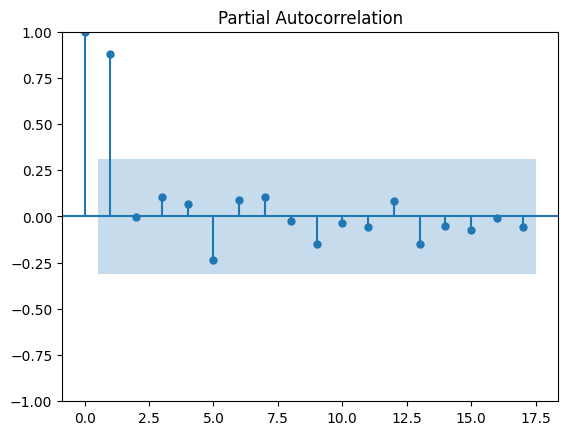

In [ ]:
# Análise da autocorrelação e autocorrelação parcial para escolher os parâmetros p, d, q
plot_acf(y_arima)
plot_pacf(y_arima)
plt.show()

In [ ]:
# Treino do modelo ARIMA (usando p=1, d=1, q=1 como exemplo)
arima_model = ARIMA(y_arima, order=(1, 1, 1))
arima_fitted = arima_model.fit()

In [ ]:
# Previsões do ARIMA e Ajustar o índice da previsão
y_pred_arima = arima_fitted.forecast(steps=len(y.loc['2022-03-01':]))
y_pred_arima.index = y.loc['2022-03-01':].index

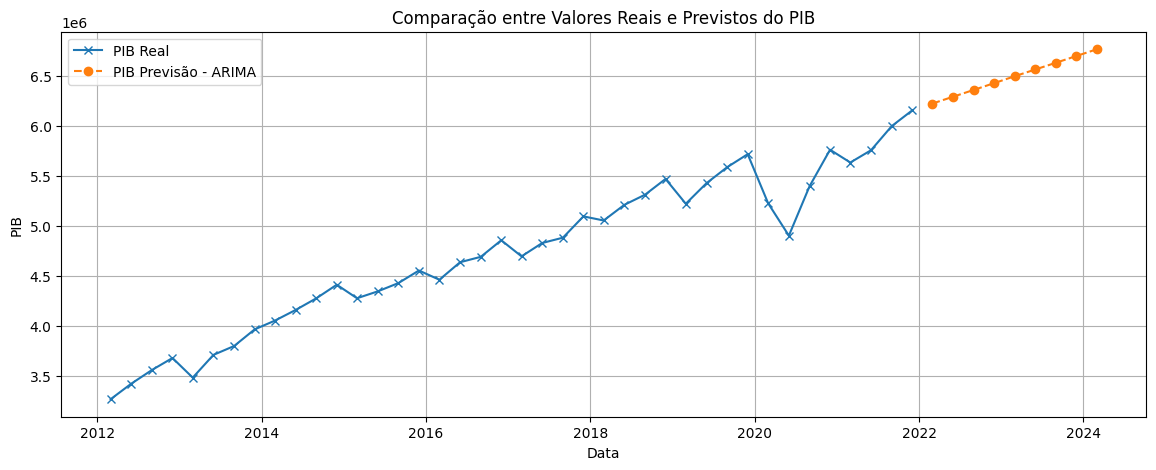

In [ ]:
# Plotar a comparação entre os valores reais e as previsões do ARIMA
plt.figure(figsize=(14, 5))
plt.plot(y.index, y, label='PIB Real', linestyle='-', marker='x')
plt.plot(y_pred_arima.index, y_pred_arima, label='PIB Previsão - ARIMA', linestyle='--', marker='o')
plt.title('Comparação entre Valores Reais e Previstos do PIB')
plt.xlabel('Data')
plt.ylabel('PIB')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Exibir dados da previsão
pd.options.display.float_format = '{:,.0f}'.format
print(y_pred_arima)

Data
2022-03-01   6,226,238
2022-06-01   6,294,519
2022-09-01   6,362,673
2022-12-01   6,430,701
2023-03-01   6,498,603
2023-06-01   6,566,380
2023-09-01   6,634,031
2023-12-01   6,701,557
2024-03-01   6,768,958
Name: predicted_mean, dtype: float64
